**Case Study #1**


Dataset location
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

Install Required PIP modules

In [2]:
%pip install kagglehub 
%pip install numpy pandas matplotlib seaborn scikit-learn scikit-image


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 49.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 55.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 48.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 49.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 49.2 MB/s eta 0:00:0000:0100:01

[not

Load python modules

In [3]:
# Load Modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Download the dataset and move it to the "data" folder

In [4]:
import os
import kagglehub
import shutil

# Create data directory if it doesn't exist
os.makedirs("./data", exist_ok=True)

# Download the dataset (this will go to a temporary location)
path = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")

# Move the downloaded file to your desired location
path = path+"/WA_Fn-UseC_-HR-Employee-Attrition.csv"
shutil.copy(path, "./data/ibm_hr_dataset.csv")

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 50.1k/50.1k [00:00<00:00, 4.08MB/s]

Extracting files...


'./data/ibm_hr_dataset.csv'

Load the dataset into Pandas and convert categories to numeric representations

In [5]:
"""Load and prepare the IBM HR Analytics dataset"""
df = pd.read_csv('./data/ibm_hr_dataset.csv')

# Convert categorical variables to numeric
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 
                        'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

df, df_encoded

(      Age Attrition     BusinessTravel  DailyRate              Department  \
 0      41       Yes      Travel_Rarely       1102                   Sales   
 1      49        No  Travel_Frequently        279  Research & Development   
 2      37       Yes      Travel_Rarely       1373  Research & Development   
 3      33        No  Travel_Frequently       1392  Research & Development   
 4      27        No      Travel_Rarely        591  Research & Development   
 ...   ...       ...                ...        ...                     ...   
 1465   36        No  Travel_Frequently        884  Research & Development   
 1466   39        No      Travel_Rarely        613  Research & Development   
 1467   27        No      Travel_Rarely        155  Research & Development   
 1468   49        No  Travel_Frequently       1023                   Sales   
 1469   34        No      Travel_Rarely        628  Research & Development   
 
       DistanceFromHome  Education EducationField  EmployeeCou

# Prepare features and target variables and identify columns with missing values.
Fill the missing values with the median of the column.
Split the data into training and testing sets.
Scale the features using StandardScaler.

In [6]:
"""Prepare features and target variables"""
# First, ensure Attrition is properly encoded before dropping it
df_encoded['Attrition'] = df_encoded['Attrition'].map({'Yes': 1, 'No': 0})

# Now prepare X and y
X = df_encoded.drop(['Attrition'], axis=1)
y = df_encoded['Attrition']

# Convert any remaining object columns to numeric
for column in X.select_dtypes(include=['object']).columns:
    X[column] = pd.to_numeric(X[column], errors='coerce')

# Check for and handle missing values
print("Columns with missing values:")
print(X.isnull().sum()[X.isnull().sum() > 0])

# Fill missing values with the median of each column
X = X.fillna(X.median())

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Columns with missing values:
Over18    1470
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Generate plots of data, Work-Life Balance vs Monthly Income, Job Satisfaction vs Attrition, and Years at Company vs Job Level.

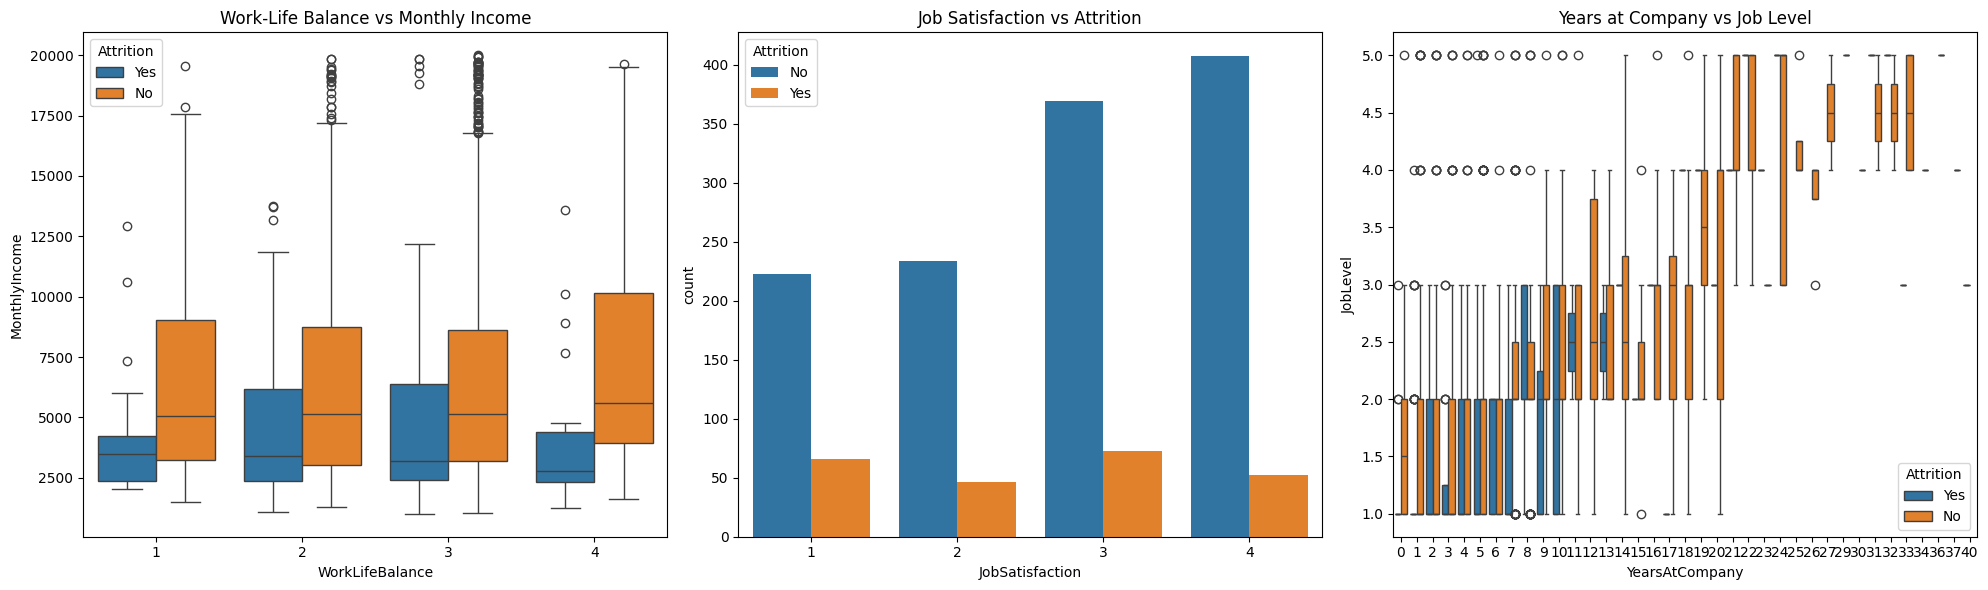

In [7]:
"""Analyze and visualize work-related factors"""
# Work-Life Balance
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='WorkLifeBalance', y='MonthlyIncome', hue='Attrition', data=df)
plt.title('Work-Life Balance vs Monthly Income')

plt.subplot(1, 3, 2)
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title('Job Satisfaction vs Attrition')

plt.subplot(1, 3, 3)
sns.boxplot(x='YearsAtCompany', y='JobLevel', hue='Attrition', data=df)
plt.title('Years at Company vs Job Level')

plt.tight_layout()
plt.show()


Show plots for demographic factors, Age Distribution by Attrition, Marital Status vs Attrition and Department vs Attrition.

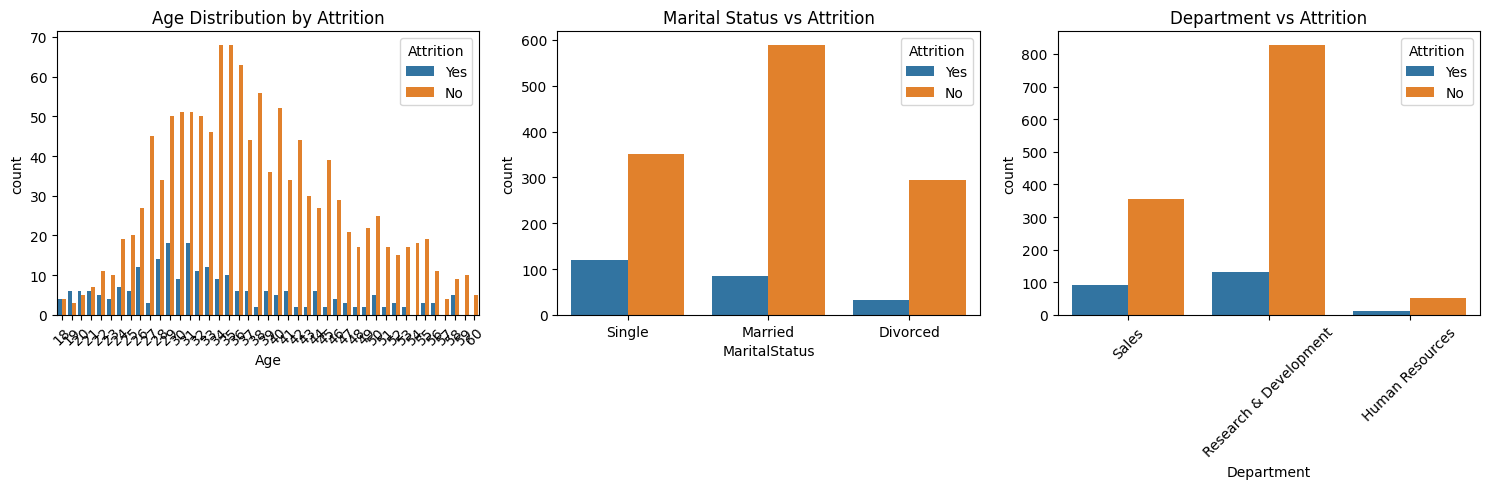

In [8]:
"""Analyze and visualize demographic factors"""
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='Age', hue='Attrition', data=df)
plt.title('Age Distribution by Attrition')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.countplot(x='MaritalStatus', hue='Attrition', data=df)
plt.title('Marital Status vs Attrition')

plt.subplot(1, 3, 3)
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Department vs Attrition')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Now that we have our data ready, we can train a Random Forest Model. and evaluate the classification performance.

In [9]:
# Cell 1: Train Random Forest Model
"""Train Random Forest Model"""
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Print model performance metrics
print("Model Performance Metrics:")
print("\nClassification Report:")
y_pred = rf_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

Model Performance Metrics:

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.71      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.80      0.56      0.58       294
weighted avg       0.86      0.88      0.84       294



Here we work on determining the most important features that influence attrition, and find that Monthly Income, Age, and Total Working Years are the most important.

In [10]:
# Cell 2: Calculate Feature Importance
"""Calculate feature importance"""
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Display top 10 most important features
print("Top 10 Most Important Features:")
print(feature_importance.head(10))

Top 10 Most Important Features:
              feature  importance
11      MonthlyIncome    0.067519
0                 Age    0.051226
20  TotalWorkingYears    0.046415
1           DailyRate    0.045783
5      EmployeeNumber    0.045333
23     YearsAtCompany    0.042017
2    DistanceFromHome    0.041775
12        MonthlyRate    0.041764
54       OverTime_Yes    0.039564
53        OverTime_No    0.038434


We start looking at defining some recommendations based on the data analysis.

In [11]:
# Cell 3: Define Recommendations Function
def generate_recommendations(df, feature_importance):
    """Generate HR recommendations based on data analysis"""
    
    # Get top factors influencing attrition
    top_factors = feature_importance.head(3)['feature'].tolist()
    
    # Calculate key metrics
    avg_satisfaction = df['JobSatisfaction'].mean()
    attrition_rate = (df['Attrition'] == 'Yes').mean() * 100
    overtime_impact = df[df['OverTime'] == 'Yes']['Attrition'].value_counts(normalize=True).get('Yes', 0) * 100
    
    recommendations = []
    
    # Data-driven recommendations based on top factors
    recommendations.append("Key Focus Areas (based on top predictive factors):")
    for factor in top_factors:
        recommendations.append(f"- Address {factor} as it's among the top factors influencing attrition")
    
    # Specific recommendations based on metrics
    recommendations.append("\nMetrics-based Recommendations:")
    
    if avg_satisfaction < 3:  # Assuming satisfaction is on a 1-4 scale
        recommendations.append("- Priority: Improve job satisfaction through:")
        recommendations.append("  * Regular feedback sessions")
        recommendations.append("  * Career development opportunities")
    
    if overtime_impact > 20:  # If attrition is 20% higher among overtime workers
        recommendations.append("- Address work-life balance:")
        recommendations.append("  * Review overtime policies")
        recommendations.append("  * Consider additional staffing")
    
    if attrition_rate > 15:  # If overall attrition is above 15%
        recommendations.append("- Implement retention strategies:")
        recommendations.append("  * Competitive compensation review")
        recommendations.append("  * Enhanced benefits package")
    
    return "\n".join(recommendations)

Here we return our recommendations.

In [12]:
# Cell 4: Generate and Print Recommendations
"""Generate recommendations based on analysis"""
recommendations = generate_recommendations(df, feature_importance)
print("HR Recommendations Based on Data Analysis:")
print(recommendations)

HR Recommendations Based on Data Analysis:
Key Focus Areas (based on top predictive factors):
- Address MonthlyIncome as it's among the top factors influencing attrition
- Address Age as it's among the top factors influencing attrition
- Address TotalWorkingYears as it's among the top factors influencing attrition

Metrics-based Recommendations:
- Priority: Improve job satisfaction through:
  * Regular feedback sessions
  * Career development opportunities
- Address work-life balance:
  * Review overtime policies
  * Consider additional staffing
- Implement retention strategies:
  * Competitive compensation review
  * Enhanced benefits package


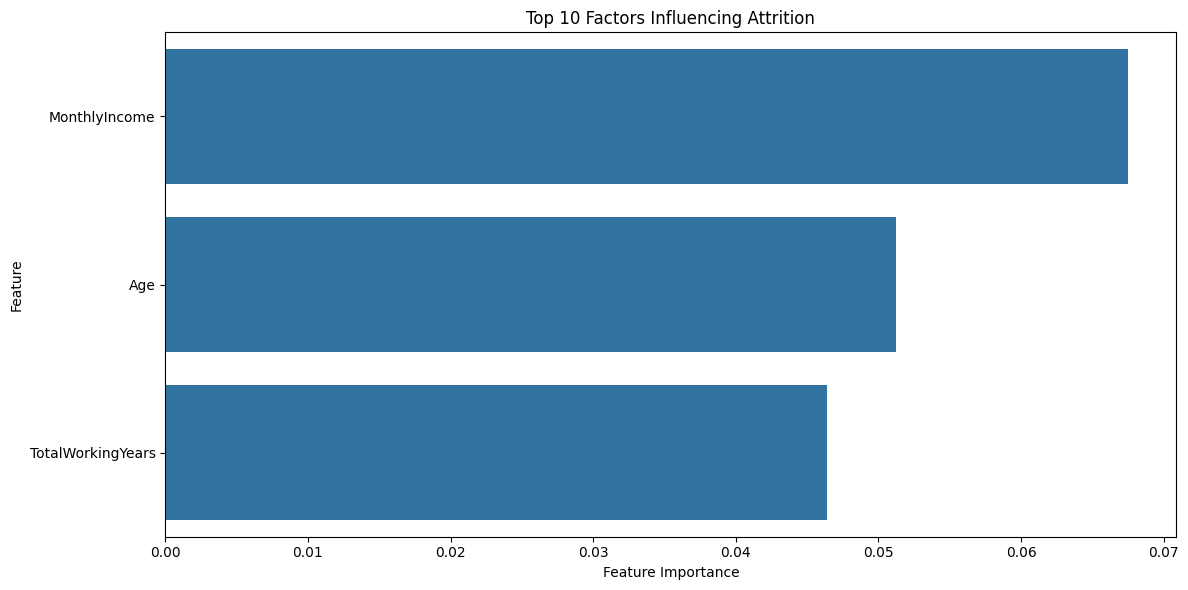

In [13]:
# Cell 5: Visualize Feature Importance
"""Visualize top factors influencing attrition"""
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(3), x='importance', y='feature')
plt.title('Top 10 Factors Influencing Attrition')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [14]:
# Cell 1: Detailed Analysis of Top Factors
"""Analyze top factors in detail"""
def analyze_top_factors(df, feature_importance, n_factors=5):
    top_factors = feature_importance.head(n_factors)
    detailed_analysis = []
    
    for _, row in top_factors.iterrows():
        factor = row['feature']
        importance = row['importance']
        
        detailed_analysis.append(f"\n=== Analysis of {factor} (Importance: {importance:.3f}) ===")
        
        if factor in df.columns:  # Ensure factor exists in original dataframe
            # Basic statistics
            stats = df.groupby('Attrition')[factor].agg(['mean', 'median', 'std']).round(2)
            detailed_analysis.append("\nStatistics by Attrition Status:")
            detailed_analysis.append(str(stats))
            
            # Distribution comparison
            detailed_analysis.append("\nDistribution Analysis:")
            if df[factor].nunique() <= 10:  # Categorical or discrete variable
                dist = df.groupby(factor)['Attrition'].value_counts(normalize=True).unstack()
                detailed_analysis.append(str(dist.round(3)))
            else:  # Continuous variable
                for attrition in ['Yes', 'No']:
                    subset = df[df['Attrition'] == attrition][factor]
                    detailed_analysis.append(f"\n{attrition} - Percentiles:")
                    detailed_analysis.append(str(subset.quantile([0.25, 0.5, 0.75]).round(2)))
    
    return "\n".join(detailed_analysis)

# Print detailed analysis
print(analyze_top_factors(df, feature_importance))


=== Analysis of MonthlyIncome (Importance: 0.068) ===

Statistics by Attrition Status:
              mean  median      std
Attrition                          
No         6832.74  5204.0  4818.21
Yes        4787.09  3202.0  3640.21

Distribution Analysis:

Yes - Percentiles:
0.25    2373.0
0.50    3202.0
0.75    5916.0
Name: MonthlyIncome, dtype: float64

No - Percentiles:
0.25    3211.0
0.50    5204.0
0.75    8834.0
Name: MonthlyIncome, dtype: float64

=== Analysis of Age (Importance: 0.051) ===

Statistics by Attrition Status:
            mean  median   std
Attrition                     
No         37.56    36.0  8.89
Yes        33.61    32.0  9.69

Distribution Analysis:

Yes - Percentiles:
0.25    28.0
0.50    32.0
0.75    39.0
Name: Age, dtype: float64

No - Percentiles:
0.25    31.0
0.50    36.0
0.75    43.0
Name: Age, dtype: float64

=== Analysis of TotalWorkingYears (Importance: 0.046) ===

Statistics by Attrition Status:
            mean  median   std
Attrition                

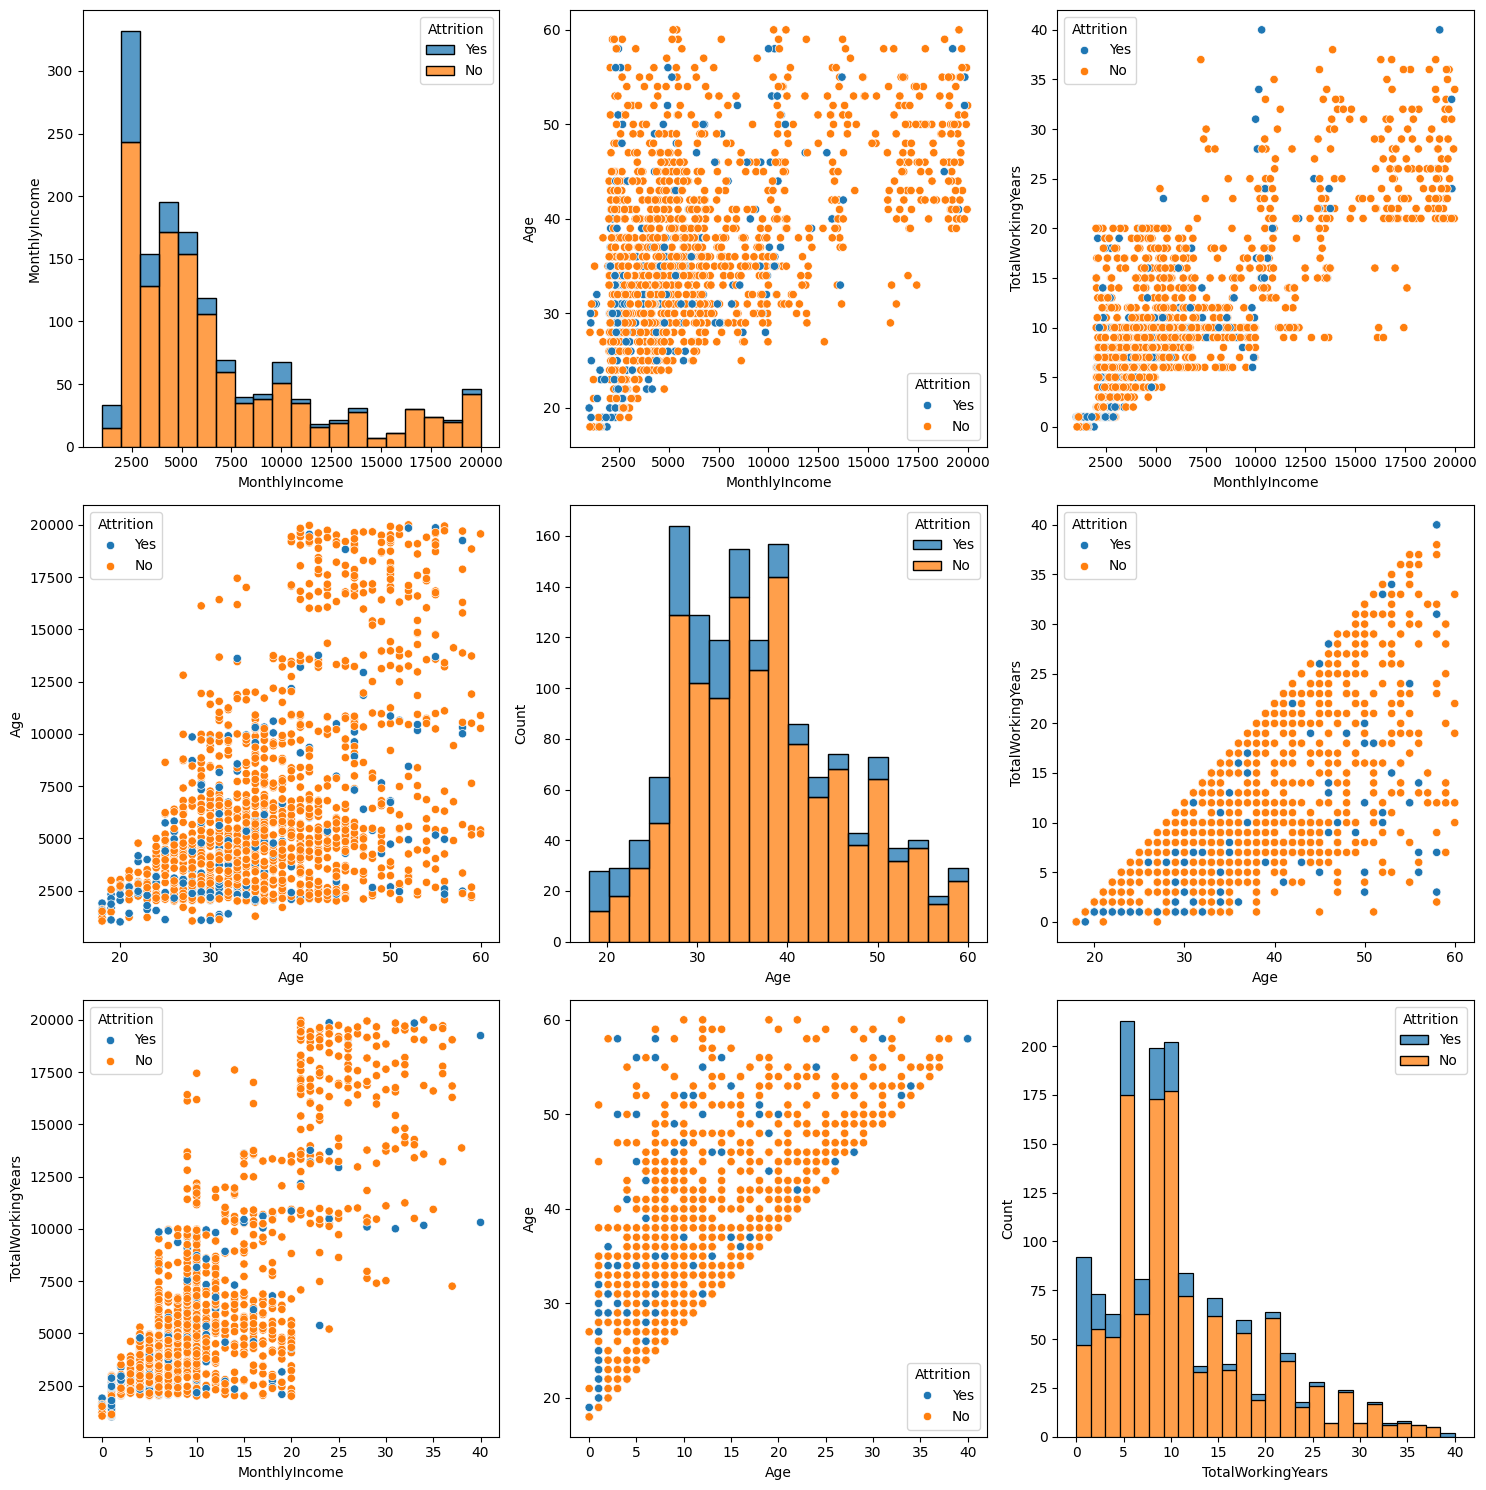

In [15]:
# Cell 2: Visualization of Factor Relationships
"""Visualize relationships between top factors"""
def visualize_factor_relationships(df, feature_importance, n_factors=3):
    top_factors = feature_importance.head(n_factors)['feature'].tolist()
    
    # Create subplots for each pair of top factors
    fig, axes = plt.subplots(n_factors, n_factors, figsize=(15, 15))
    
    for i, factor1 in enumerate(top_factors):
        for j, factor2 in enumerate(top_factors):
            if i != j:
                # Scatter plot for continuous variables
                sns.scatterplot(data=df, x=factor1, y=factor2, 
                              hue='Attrition', ax=axes[i, j])
            else:
                # Distribution plot for single variable
                sns.histplot(data=df, x=factor1, hue='Attrition', 
                           multiple="stack", ax=axes[i, i])
            
            if i == n_factors-1:
                axes[i, j].set_xlabel(factor2)
            if j == 0:
                axes[i, j].set_ylabel(factor1)
                
    plt.tight_layout()
    plt.show()

visualize_factor_relationships(df, feature_importance)

In [16]:
# Cell 3: Statistical Tests
"""Perform statistical tests on top factors"""
def statistical_analysis(df, feature_importance, n_factors=5):
    from scipy import stats
    top_factors = feature_importance.head(n_factors)['feature'].tolist()
    analysis_results = []
    
    for factor in top_factors:
        analysis_results.append(f"\n=== Statistical Analysis for {factor} ===")
        
        # Split data by attrition
        yes_group = df[df['Attrition'] == 'Yes'][factor]
        no_group = df[df['Attrition'] == 'No'][factor]
        
        # Perform t-test
        t_stat, p_value = stats.ttest_ind(yes_group, no_group)
        analysis_results.append(f"T-test p-value: {p_value:.4f}")
        
        # Effect size (Cohen's d)
        d = (yes_group.mean() - no_group.mean()) / np.sqrt((yes_group.var() + no_group.var()) / 2)
        analysis_results.append(f"Effect size (Cohen's d): {d:.4f}")
        
        # Correlation with other factors
        correlations = df[top_factors].corr()[factor].sort_values(ascending=False)
        analysis_results.append("\nTop correlations:")
        analysis_results.append(str(correlations.round(3)))
    
    return "\n".join(analysis_results)

print(statistical_analysis(df, feature_importance))


=== Statistical Analysis for MonthlyIncome ===
T-test p-value: 0.0000
Effect size (Cohen's d): -0.4791

Top correlations:
MonthlyIncome        1.000
TotalWorkingYears    0.773
Age                  0.498
DailyRate            0.008
EmployeeNumber      -0.015
Name: MonthlyIncome, dtype: float64

=== Statistical Analysis for Age ===
T-test p-value: 0.0000
Effect size (Cohen's d): -0.4252

Top correlations:
Age                  1.000
TotalWorkingYears    0.680
MonthlyIncome        0.498
DailyRate            0.011
EmployeeNumber      -0.010
Name: Age, dtype: float64

=== Statistical Analysis for TotalWorkingYears ===
T-test p-value: 0.0000
Effect size (Cohen's d): -0.4843

Top correlations:
TotalWorkingYears    1.000
MonthlyIncome        0.773
Age                  0.680
DailyRate            0.015
EmployeeNumber      -0.014
Name: TotalWorkingYears, dtype: float64

=== Statistical Analysis for DailyRate ===
T-test p-value: 0.0299
Effect size (Cohen's d): -0.1544

Top correlations:
DailyRate  

In [17]:
# Cell 1: Employee Profile Analysis
"""Analyze employee profiles and segments"""
def analyze_employee_profiles(df):
    profiles = []
    
    # High-risk profile
    high_risk = df[df['Attrition'] == 'Yes']
    profiles.append("\n=== High Risk Employee Profile ===")
    profiles.append("Average age: {:.1f}".format(high_risk['Age'].mean()))
    profiles.append("Most common job roles: \n{}".format(high_risk['JobRole'].value_counts().head(3)))
    profiles.append("Average years at company: {:.1f}".format(high_risk['YearsAtCompany'].mean()))
    
    # Salary analysis by job level
    profiles.append("\n=== Salary Analysis ===")
    salary_analysis = df.groupby('JobLevel').agg({
        'MonthlyIncome': ['mean', 'std'],
        'Attrition': lambda x: (x == 'Yes').mean()
    }).round(2)
    profiles.append(str(salary_analysis))
    
    return "\n".join(profiles)

print(analyze_employee_profiles(df))


=== High Risk Employee Profile ===
Average age: 33.6
Most common job roles: 
JobRole
Laboratory Technician    62
Sales Executive          57
Research Scientist       47
Name: count, dtype: int64
Average years at company: 5.1

=== Salary Analysis ===
         MonthlyIncome          Attrition
                  mean      std  <lambda>
JobLevel                                 
1              2786.92   748.63      0.26
2              5502.28  1410.03      0.10
3              9817.25  1806.00      0.15
4             15503.78  1816.24      0.05
5             19191.83   512.38      0.07


In [18]:
# Cell 2: Career Progression Analysis
"""Analyze career progression patterns"""
def analyze_career_progression(df):
    progression = []
    
    # Time to promotion analysis
    progression.append("\n=== Career Progression Metrics ===")
    df['PromotionRate'] = df['YearsSinceLastPromotion'] / df['YearsAtCompany']
    
    for dept in df['Department'].unique():
        dept_data = df[df['Department'] == dept]
        progression.append(f"\n{dept} Department:")
        progression.append(f"Average years to promotion: {dept_data['YearsSinceLastPromotion'].mean():.1f}")
        progression.append(f"Promotion rate: {dept_data['PromotionRate'].mean():.2%}")
    
    return "\n".join(progression)

print(analyze_career_progression(df))


=== Career Progression Metrics ===

Sales Department:
Average years to promotion: 2.4
Promotion rate: 31.88%

Research & Development Department:
Average years to promotion: 2.1
Promotion rate: 29.15%

Human Resources Department:
Average years to promotion: 1.8
Promotion rate: 28.01%


In [19]:
# Cell 3: Work-Life Balance Impact
"""Analyze work-life balance factors"""
def analyze_work_life_balance(df):
    analysis = []
    
    # Overtime analysis
    analysis.append("\n=== Work-Life Balance Analysis ===")
    overtime_impact = pd.crosstab(
        df['OverTime'], 
        df['Attrition'], 
        normalize='index'
    )
    analysis.append("\nOvertime Impact on Attrition:")
    analysis.append(str(overtime_impact))
    
    # Distance from home analysis
    analysis.append("\nDistance From Home Impact:")
    distance_groups = pd.qcut(df['DistanceFromHome'], q=4, labels=['Close', 'Medium', 'Far', 'Very Far'])
    distance_impact = pd.crosstab(
        distance_groups,
        df['Attrition'],
        normalize='index'
    )
    analysis.append(str(distance_impact))
    
    return "\n".join(analysis)

print(analyze_work_life_balance(df))


=== Work-Life Balance Analysis ===

Overtime Impact on Attrition:
Attrition        No       Yes
OverTime                     
No         0.895636  0.104364
Yes        0.694712  0.305288

Distance From Home Impact:
Attrition               No       Yes
DistanceFromHome                    
Close             0.871122  0.128878
Medium            0.856742  0.143258
Far               0.826471  0.173529
Very Far          0.794366  0.205634


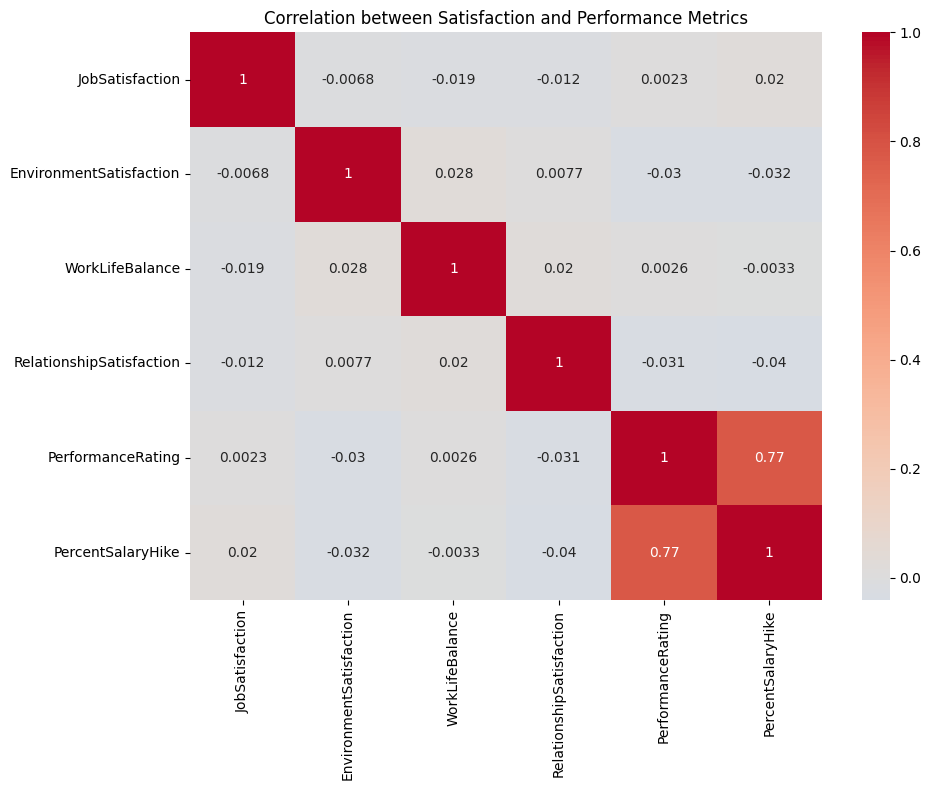


=== Satisfaction Scores by Department ===
                        JobSatisfaction  EnvironmentSatisfaction  \
Department                                                         
Human Resources                    2.60                     2.68   
Research & Development             2.73                     2.74   
Sales                              2.75                     2.68   

                        WorkLifeBalance  RelationshipSatisfaction  
Department                                                         
Human Resources                    2.92                      2.89  
Research & Development             2.73                      2.71  
Sales                              2.82                      2.70  


In [20]:
# Cell 4: Performance and Satisfaction Correlation
"""Analyze relationship between performance and satisfaction"""
def analyze_performance_satisfaction(df):
    analysis = []
    
    # Create correlation matrix
    satisfaction_cols = ['JobSatisfaction', 'EnvironmentSatisfaction', 
                        'WorkLifeBalance', 'RelationshipSatisfaction']
    performance_cols = ['PerformanceRating', 'PercentSalaryHike']
    
    corr_matrix = df[satisfaction_cols + performance_cols].corr()
    
    # Visualize correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation between Satisfaction and Performance Metrics')
    plt.tight_layout()
    plt.show()
    
    # Calculate satisfaction scores by department
    analysis.append("\n=== Satisfaction Scores by Department ===")
    dept_satisfaction = df.groupby('Department')[satisfaction_cols].mean().round(2)
    analysis.append(str(dept_satisfaction))
    
    return "\n".join(analysis)

print(analyze_performance_satisfaction(df))

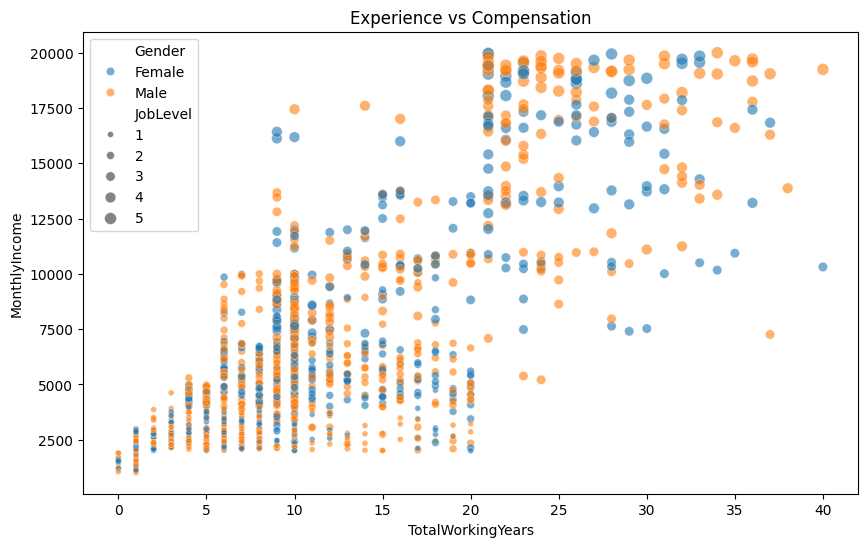


=== Compensation Equity Analysis ===

Gender Pay Analysis by Job Level:
                     mean  count
JobLevel Gender                 
1        Female   2780.49    199
         Male     2790.63    344
2        Female   5435.33    220
         Male     5549.18    314
3        Female   9962.70     94
         Male     9706.99    124
4        Female  15431.37     51
         Male    15570.93     55
5        Female  19129.92     24
         Male    19224.84     45


In [21]:
# Cell 5: Compensation Analysis
"""Analyze compensation patterns and fairness"""
def analyze_compensation(df):
    analysis = []
    
    # Salary equity analysis
    analysis.append("\n=== Compensation Equity Analysis ===")
    
    # Gender pay analysis
    gender_pay = df.groupby(['JobLevel', 'Gender'])['MonthlyIncome'].agg(['mean', 'count']).round(2)
    analysis.append("\nGender Pay Analysis by Job Level:")
    analysis.append(str(gender_pay))
    
    # Experience vs compensation
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='TotalWorkingYears', y='MonthlyIncome', 
                    hue='Gender', size='JobLevel', alpha=0.6)
    plt.title('Experience vs Compensation')
    plt.show()
    
    return "\n".join(analysis)

print(analyze_compensation(df))

=== WorkLifeBalance Distribution ===
WorkLifeBalance
1     80
2    344
3    893
4    153
Name: count, dtype: int64

Value counts (percentage):
WorkLifeBalance
1     5.4
2    23.4
3    60.7
4    10.4
Name: proportion, dtype: float64 %


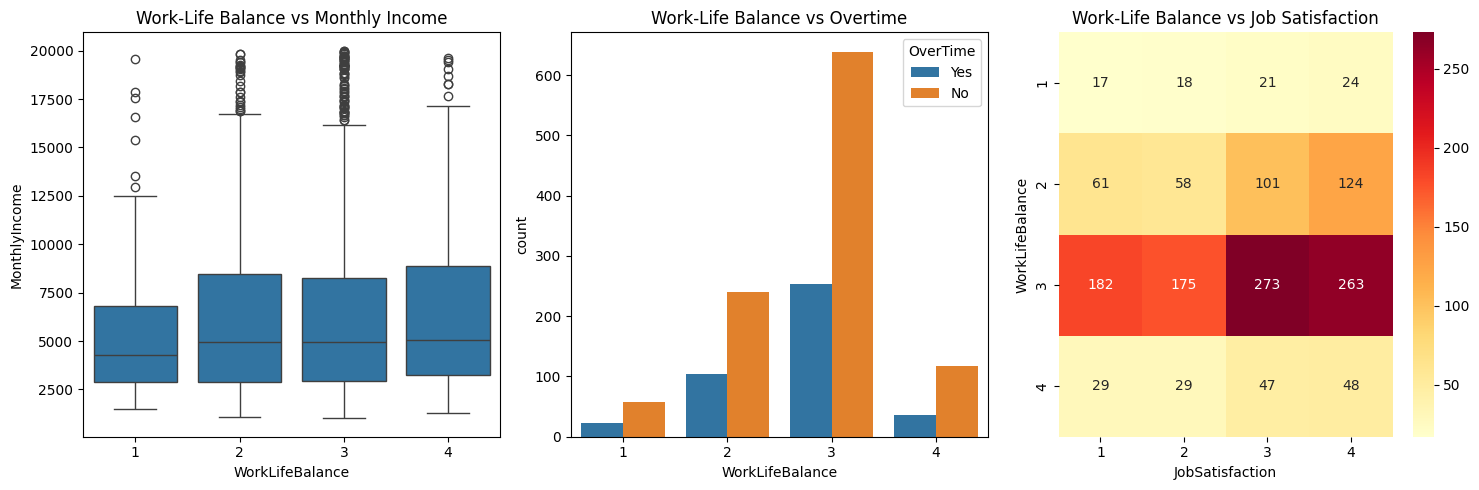


=== Work-Life Balance by Department ===
WorkLifeBalance          1    2    3   4
Department                              
Human Resources          4    7   42  10
Research & Development  60  235  575  91
Sales                   16  102  276  52

=== Average Monthly Income by Work-Life Balance ===
WorkLifeBalance
1    5887.14
2    6461.81
3    6532.23
4    6746.35
Name: MonthlyIncome, dtype: float64

=== Attrition Rate by Work-Life Balance ===
WorkLifeBalance
1    31.2
2    16.9
3    14.2
4    17.6
Name: Yes, dtype: float64 %


In [22]:
"""Analyze WorkLifeBalance variable in detail"""
# Basic distribution
print("=== WorkLifeBalance Distribution ===")
print(df['WorkLifeBalance'].value_counts().sort_index())
print("\nValue counts (percentage):")
print(df['WorkLifeBalance'].value_counts(normalize=True).sort_index().round(3) * 100, "%")

# Relationship with other variables
plt.figure(figsize=(15, 5))

# Work-Life Balance vs Monthly Income
plt.subplot(1, 3, 1)
sns.boxplot(x='WorkLifeBalance', y='MonthlyIncome', data=df)
plt.title('Work-Life Balance vs Monthly Income')

# Work-Life Balance vs Overtime
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='WorkLifeBalance', hue='OverTime')
plt.title('Work-Life Balance vs Overtime')

# Work-Life Balance vs Job Satisfaction
plt.subplot(1, 3, 3)
sns.heatmap(pd.crosstab(df['WorkLifeBalance'], df['JobSatisfaction']), 
            annot=True, fmt='d', cmap='YlOrRd')
plt.title('Work-Life Balance vs Job Satisfaction')

plt.tight_layout()
plt.show()

# Additional analysis
print("\n=== Work-Life Balance by Department ===")
print(pd.crosstab(df['Department'], df['WorkLifeBalance']))

print("\n=== Average Monthly Income by Work-Life Balance ===")
print(df.groupby('WorkLifeBalance')['MonthlyIncome'].mean().round(2))

print("\n=== Attrition Rate by Work-Life Balance ===")
attrition_by_wlb = pd.crosstab(df['WorkLifeBalance'], df['Attrition'], normalize='index')
print(attrition_by_wlb['Yes'].round(3) * 100, "%")

In [23]:
# Check data completeness and types
print("Dataset Shape:", df.shape)
print("\nMissing Values:")
print(df.isnull().sum()[df.isnull().sum() > 0])
print("\nData Types:")
print(df.dtypes)

# Check unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())

Dataset Shape: (1470, 36)

Missing Values:
PromotionRate    44
dtype: int64

Data Types:
Age                           int64
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
Relationshi

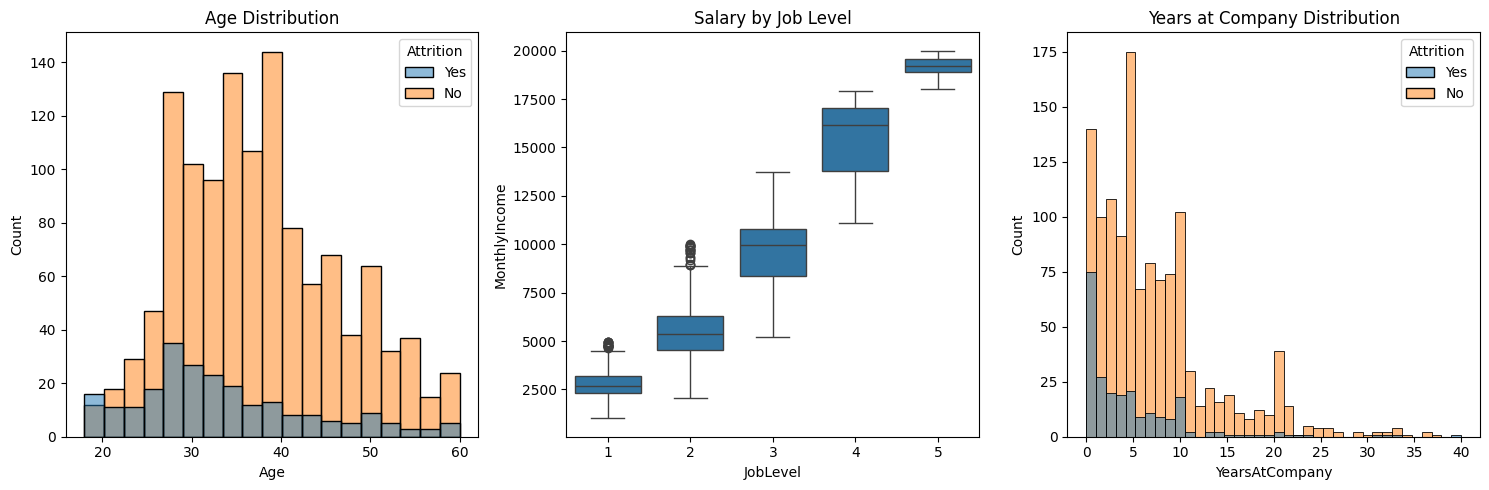

In [24]:
# Check for unusual distributions or patterns
# Age distribution
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Age', hue='Attrition')
plt.title('Age Distribution')

# Salary distribution
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='JobLevel', y='MonthlyIncome')
plt.title('Salary by Job Level')

# Years at company
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition')
plt.title('Years at Company Distribution')

plt.tight_layout()
plt.show()

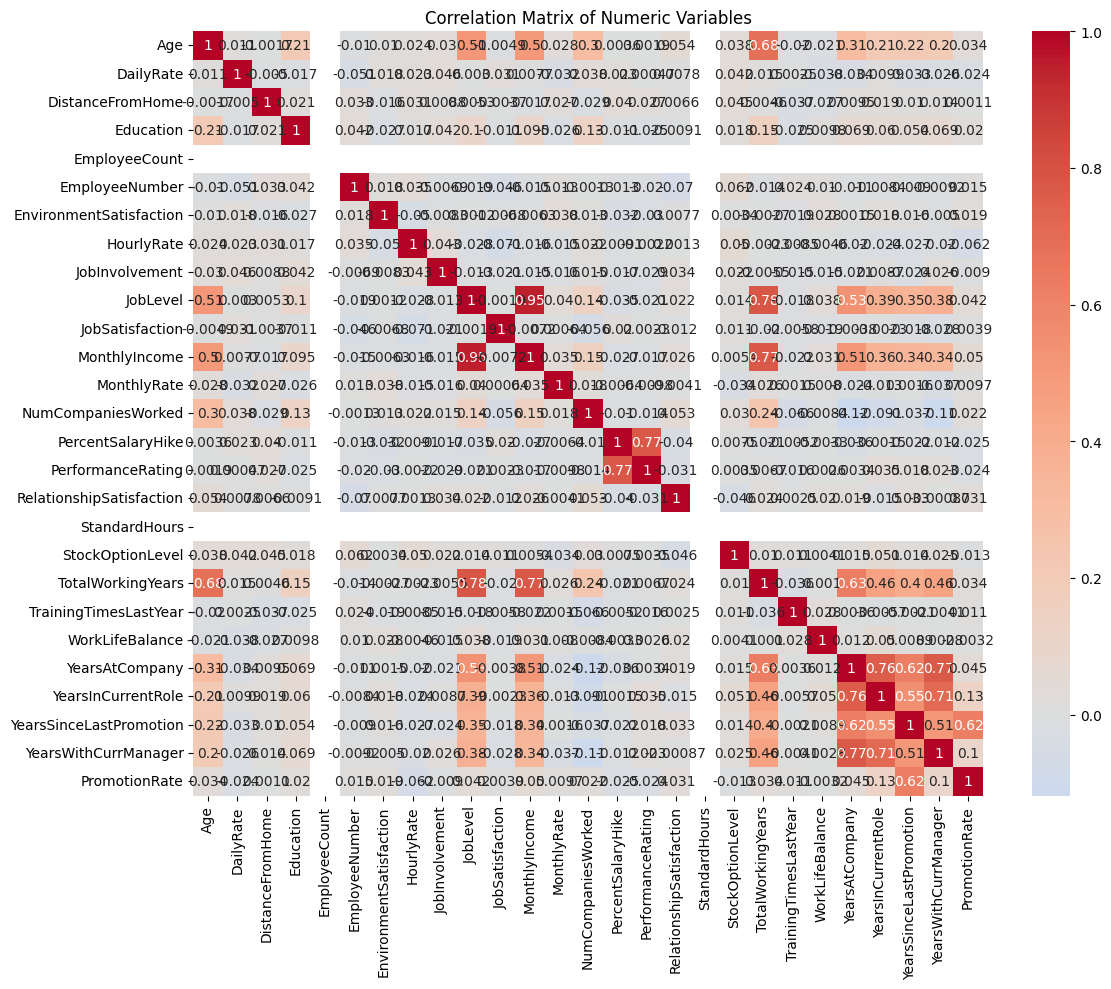

In [25]:
# Create correlation matrix for numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

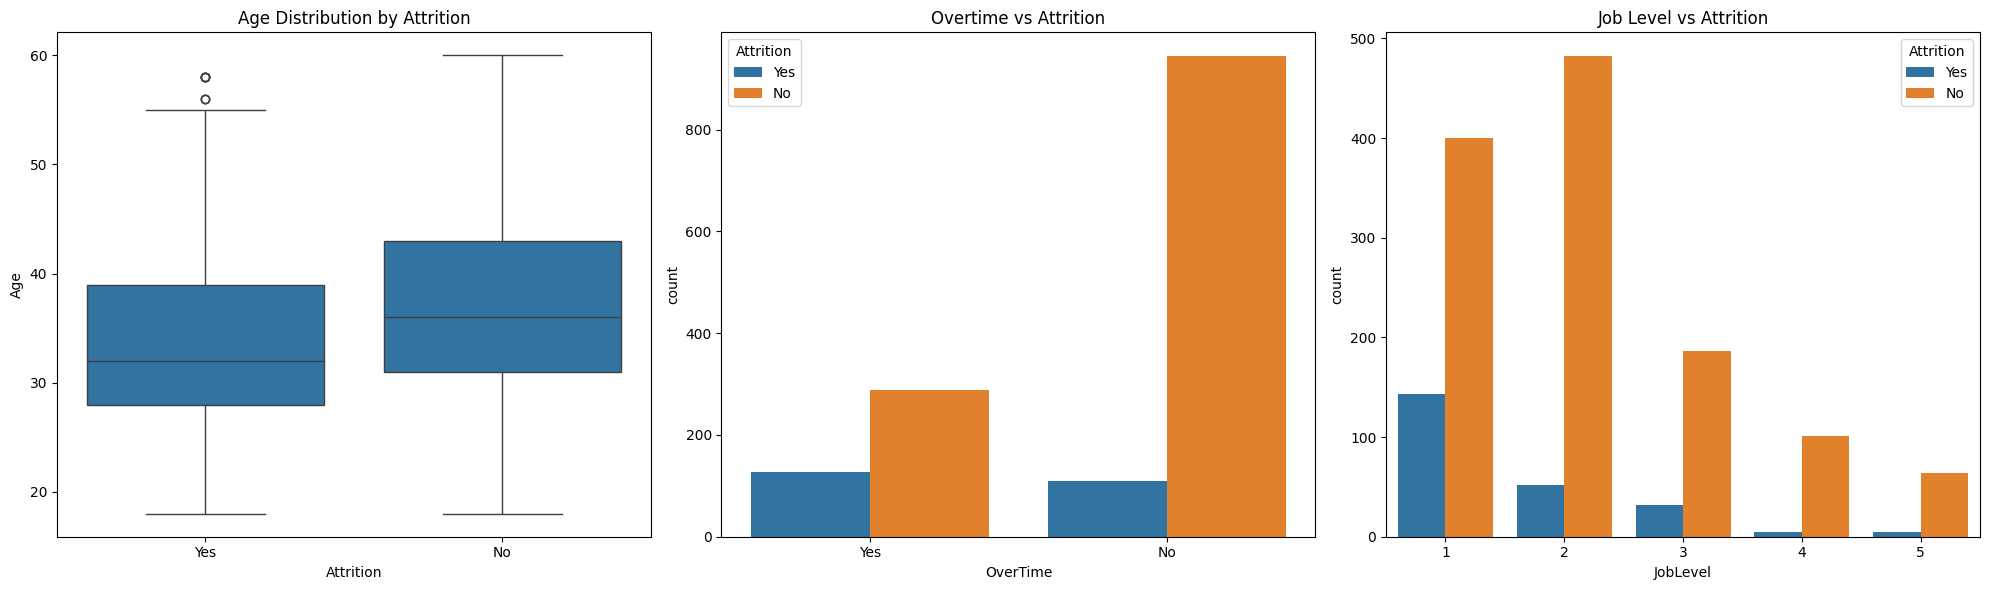

In [26]:
# Cell 1: Attrition Patterns
plt.figure(figsize=(20, 6))

# Age and Attrition
plt.subplot(1, 3, 1)
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Age Distribution by Attrition')

# Overtime and Attrition
plt.subplot(1, 3, 2)
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('Overtime vs Attrition')

# Job Level and Attrition
plt.subplot(1, 3, 3)
sns.countplot(x='JobLevel', hue='Attrition', data=df)
plt.title('Job Level vs Attrition')

plt.tight_layout()
plt.show()

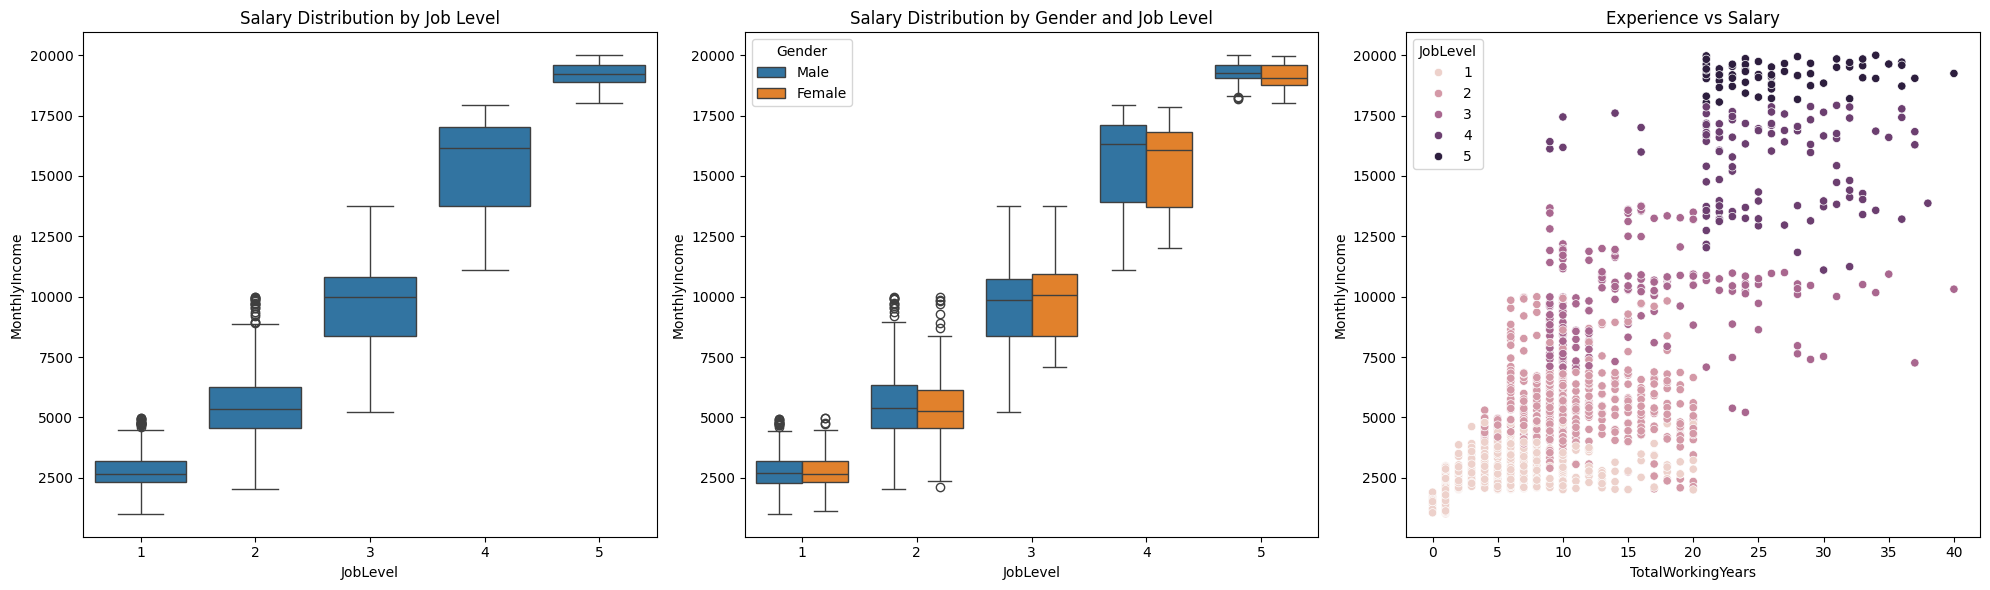

In [27]:
# Cell 2: Compensation Analysis
plt.figure(figsize=(20, 6))

# Salary by Job Level
plt.subplot(1, 3, 1)
sns.boxplot(x='JobLevel', y='MonthlyIncome', data=df)
plt.title('Salary Distribution by Job Level')

# Gender Pay Analysis
plt.subplot(1, 3, 2)
sns.boxplot(x='JobLevel', y='MonthlyIncome', hue='Gender', data=df)
plt.title('Salary Distribution by Gender and Job Level')

# Experience vs Salary
plt.subplot(1, 3, 3)
sns.scatterplot(x='TotalWorkingYears', y='MonthlyIncome', hue='JobLevel', data=df)
plt.title('Experience vs Salary')

plt.tight_layout()
plt.show()

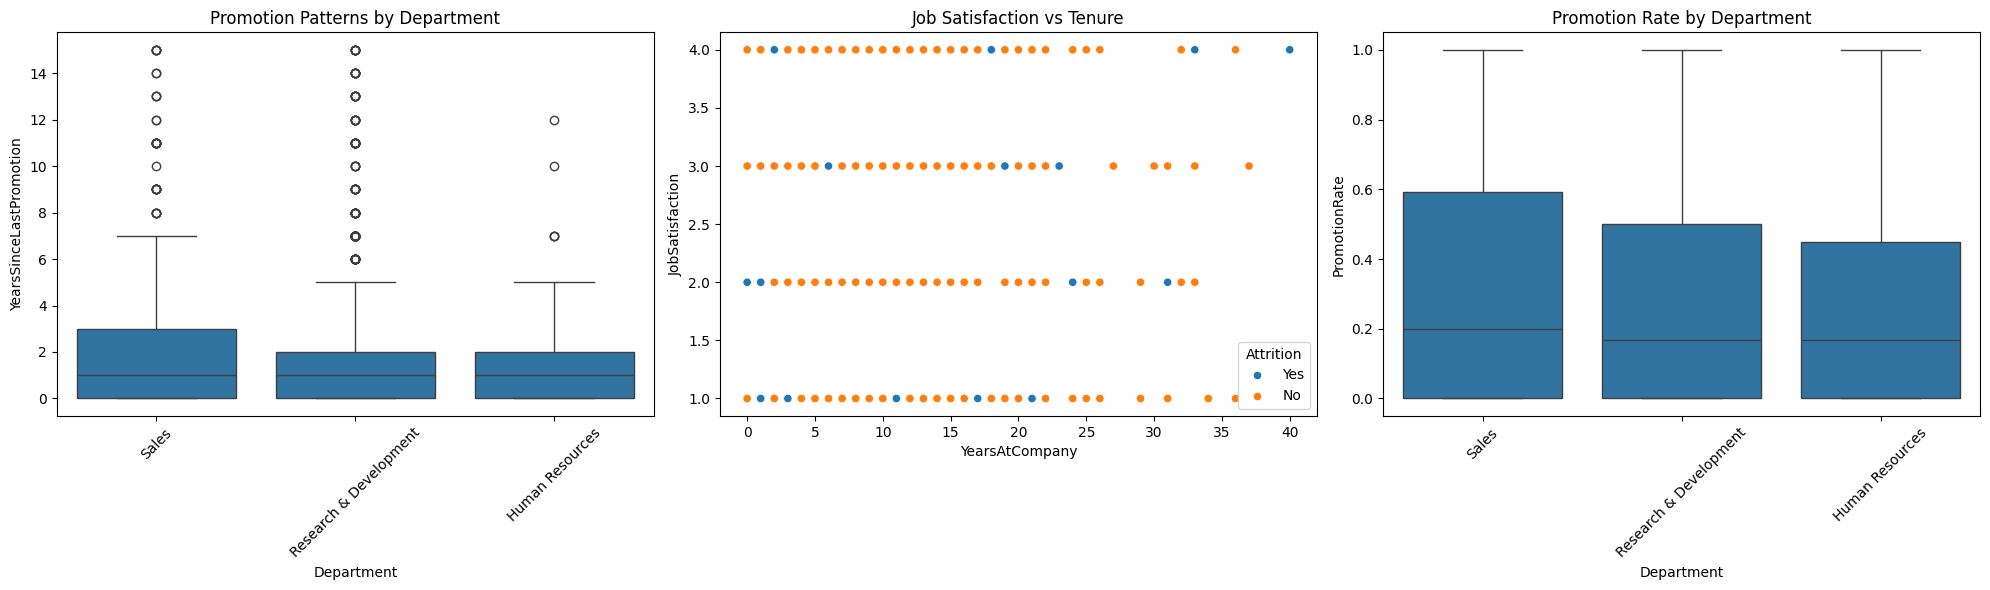

In [28]:
# Cell 3: Career Development
plt.figure(figsize=(20, 6))

# Years Since Last Promotion by Department
plt.subplot(1, 3, 1)
sns.boxplot(x='Department', y='YearsSinceLastPromotion', data=df)
plt.xticks(rotation=45)
plt.title('Promotion Patterns by Department')

# Job Satisfaction vs Years at Company
plt.subplot(1, 3, 2)
sns.scatterplot(x='YearsAtCompany', y='JobSatisfaction', hue='Attrition', data=df)
plt.title('Job Satisfaction vs Tenure')

# Promotion Rate by Department
plt.subplot(1, 3, 3)
df['PromotionRate'] = df['YearsSinceLastPromotion'] / df['YearsAtCompany']
sns.boxplot(x='Department', y='PromotionRate', data=df)
plt.xticks(rotation=45)
plt.title('Promotion Rate by Department')

plt.tight_layout()
plt.show()

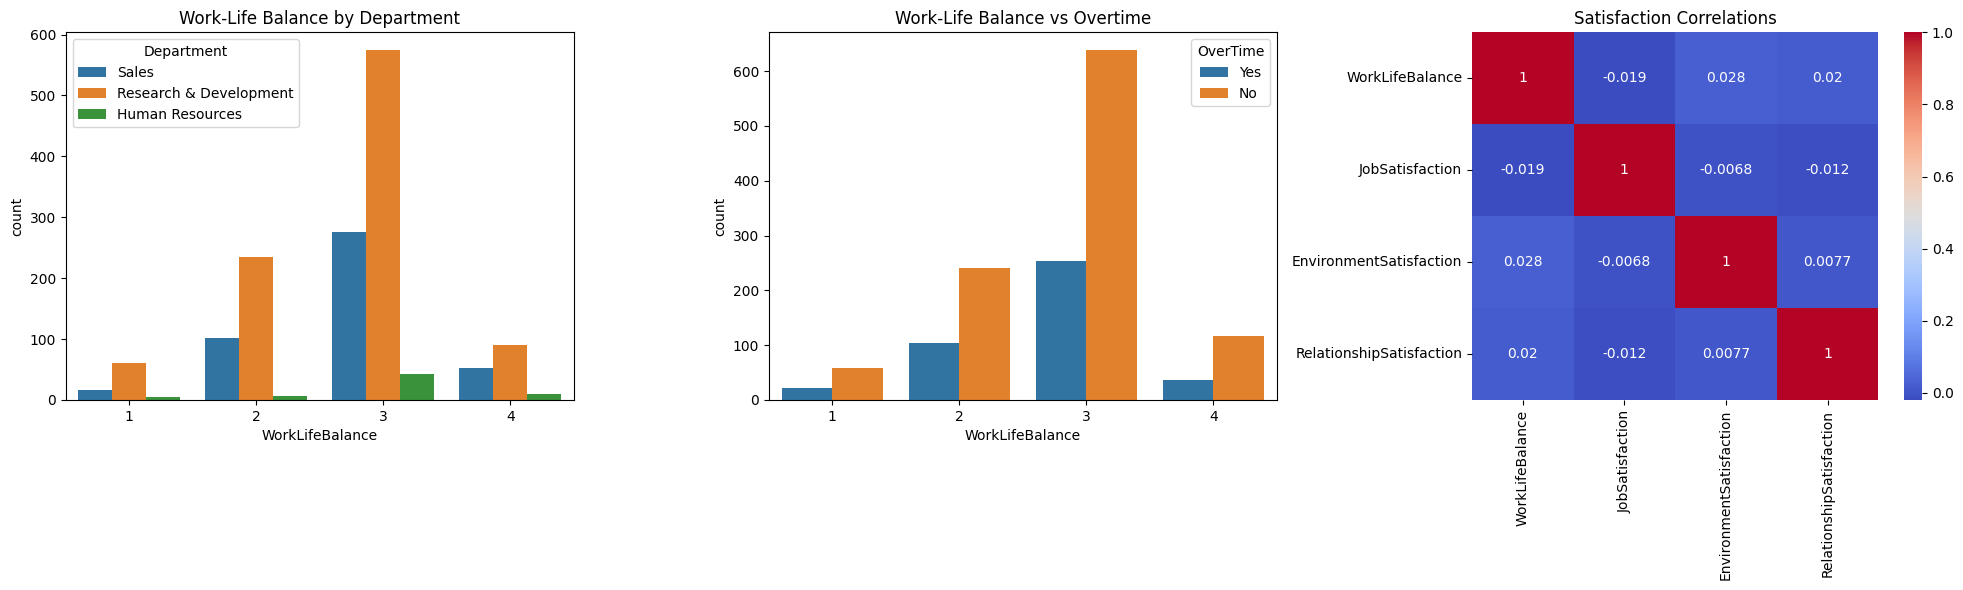

In [29]:
# Cell 4: Work-Life Balance Analysis
plt.figure(figsize=(20, 6))

# Work-Life Balance Distribution
plt.subplot(1, 3, 1)
sns.countplot(x='WorkLifeBalance', hue='Department', data=df)
plt.title('Work-Life Balance by Department')

# Overtime Impact
plt.subplot(1, 3, 2)
sns.countplot(x='WorkLifeBalance', hue='OverTime', data=df)
plt.title('Work-Life Balance vs Overtime')

# Satisfaction Correlation
plt.subplot(1, 3, 3)
satisfaction_corr = df[['WorkLifeBalance', 'JobSatisfaction', 
                       'EnvironmentSatisfaction', 'RelationshipSatisfaction']].corr()
sns.heatmap(satisfaction_corr, annot=True, cmap='coolwarm')
plt.title('Satisfaction Correlations')

plt.tight_layout()
plt.show()

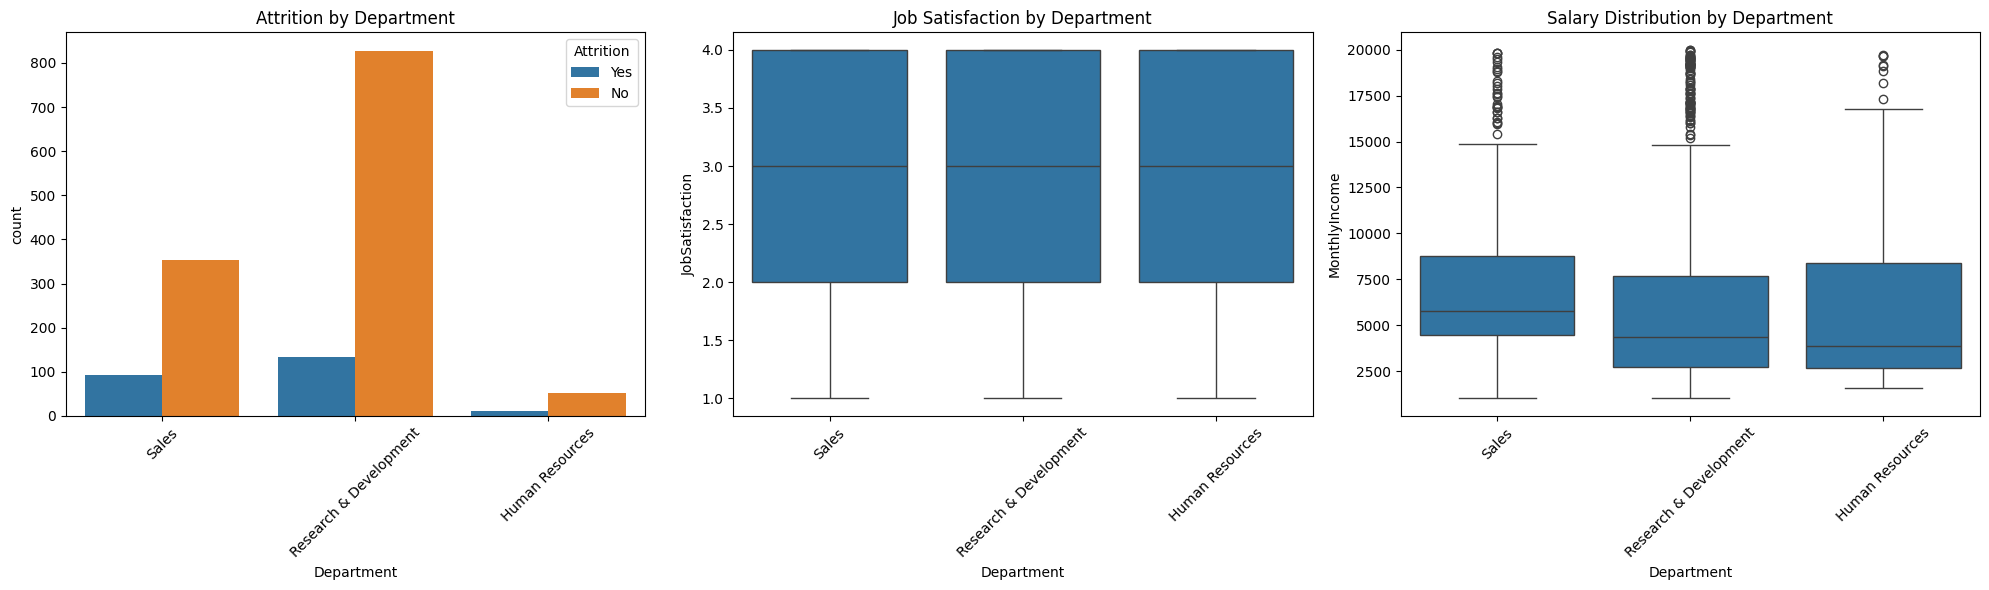

In [30]:
# Cell 5: Department-Specific Analysis
plt.figure(figsize=(20, 6))

# Attrition by Department
plt.subplot(1, 3, 1)
sns.countplot(x='Department', hue='Attrition', data=df)
plt.xticks(rotation=45)
plt.title('Attrition by Department')

# Satisfaction by Department
plt.subplot(1, 3, 2)
sns.boxplot(x='Department', y='JobSatisfaction', data=df)
plt.xticks(rotation=45)
plt.title('Job Satisfaction by Department')

# Monthly Income by Department
plt.subplot(1, 3, 3)
sns.boxplot(x='Department', y='MonthlyIncome', data=df)
plt.xticks(rotation=45)
plt.title('Salary Distribution by Department')

plt.tight_layout()
plt.show()

In [46]:
def identify_high_risk_employees(df, df_encoded, rf_model, feature_importance):
    """Identify and analyze employees with high attrition risk"""
    
    # Use the already encoded features, dropping the target variable
    X_full = df_encoded.drop('Attrition', axis=1)
    
    # Get attrition probabilities
    attrition_prob = rf_model.predict_proba(X_full)[:, 1]
    
    # Add probability scores to original dataframe
    df_risk = df.copy()
    df_risk['AttritionRiskScore'] = attrition_prob
    
    # Define high risk threshold (top 20% of risk scores)
    high_risk_threshold = df_risk['AttritionRiskScore'].quantile(0.8)
    high_risk_employees = df_risk[df_risk['AttritionRiskScore'] >= high_risk_threshold]
    
    # Print analysis
    print("=== High Risk Employee Profile ===")
    print(f"Number of high-risk employees: {len(high_risk_employees)}")
    print(f"Average risk score: {high_risk_employees['AttritionRiskScore'].mean():.2%}")
    
    print("\nKey Characteristics of High-Risk Employees:")
    print(f"- Average Age: {high_risk_employees['Age'].mean():.1f} years")
    print(f"- Average Monthly Income: ${high_risk_employees['MonthlyIncome'].mean():.2f}")
    print(f"- Average Years at Company: {high_risk_employees['YearsAtCompany'].mean():.1f}")
    
    print("\nMost Common Departments:")
    print(high_risk_employees['Department'].value_counts().head(3))
    
    print("\nOvertime Status:")
    print(high_risk_employees['OverTime'].value_counts(normalize=True).round(3) * 100, "%")
    
    # Visualize key factors
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    sns.boxplot(data=df_risk, x='OverTime', y='AttritionRiskScore')
    plt.title('Risk Score by Overtime Status')
    
    plt.subplot(1, 3, 2)
    sns.scatterplot(data=df_risk, x='Age', y='MonthlyIncome', 
                    hue='AttritionRiskScore', size='AttritionRiskScore')
    plt.title('Age vs Income (Risk Score)')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(data=df_risk, x='JobLevel', y='AttritionRiskScore')
    plt.title('Risk Score by Job Level')
    
    plt.tight_layout()
    plt.show()
    
    return high_risk_employees

# Calculate risk scores and analyze
high_risk_df = identify_high_risk_employees(df, df_encoded, rf_model, feature_importance)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'Y'

Encoding the following non-numeric columns: Index(['Over18'], dtype='object')
=== High Risk Employee Profile ===
Number of high-risk employees: 302
Average risk score: 60.80%

Key Characteristics of High-Risk Employees:
- Average Age: 34.1 years
- Average Monthly Income: $4871.49
- Average Years at Company: 5.3

Most Common Departments:
Department
Research & Development    171
Sales                     114
Human Resources            17
Name: count, dtype: int64

Overtime Status:
OverTime
Yes    54.6%
No     45.4%
Name: proportion, dtype: object


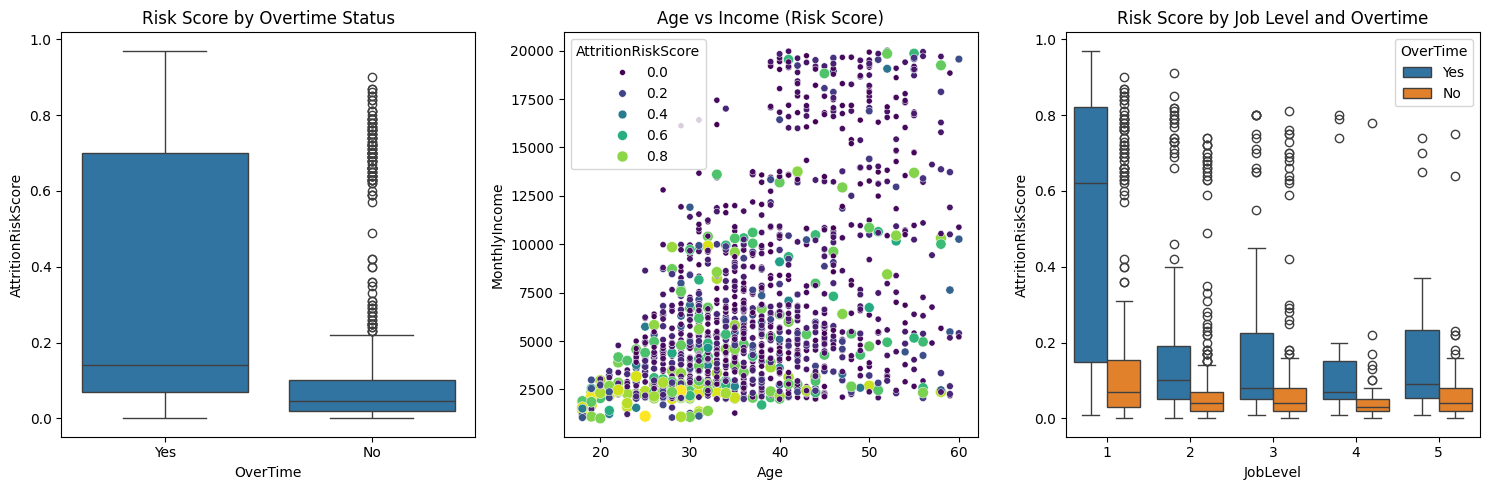

In [49]:
def identify_high_risk_employees(df, df_encoded, rf_model, scaler, feature_importance):
    """Identify and analyze employees with high attrition risk"""
    
    # Ensure all categorical variables are encoded
    # Identify non-numeric columns in df_encoded
    non_numeric_cols = df_encoded.select_dtypes(include=['object']).columns
    if len(non_numeric_cols) > 0:
        print("Encoding the following non-numeric columns:", non_numeric_cols)
        # Convert categorical variables to numeric using label encoding or one-hot encoding
        for col in non_numeric_cols:
            df_encoded[col] = df_encoded[col].astype('category').cat.codes
    
    # Prepare features (using already encoded dataframe)
    X_full = df_encoded.drop(['Attrition'], axis=1)
    
    # Ensure that the columns match the ones used during training
    missing_cols = set(X_train.columns) - set(X_full.columns)
    for col in missing_cols:
        X_full[col] = 0  # Add missing columns with default value 0
    X_full = X_full[X_train.columns]  # Ensure the same column order
    
    # Scale the features using the existing scaler
    X_full_scaled = scaler.transform(X_full)
    
    # Get attrition probabilities for all employees
    attrition_prob = rf_model.predict_proba(X_full_scaled)[:, 1]
    
    # Add probability scores to original dataframe
    df_risk = df.copy()
    df_risk['AttritionRiskScore'] = attrition_prob
    
    # Define high risk threshold (top 20% of risk scores)
    high_risk_threshold = df_risk['AttritionRiskScore'].quantile(0.8)
    high_risk_employees = df_risk[df_risk['AttritionRiskScore'] >= high_risk_threshold]
    
    # Analyze characteristics of high-risk employees
    print("=== High Risk Employee Profile ===")
    print(f"Number of high-risk employees: {len(high_risk_employees)}")
    print(f"Average risk score: {high_risk_employees['AttritionRiskScore'].mean():.2%}")
    
    print("\nKey Characteristics of High-Risk Employees:")
    print(f"- Average Age: {high_risk_employees['Age'].mean():.1f} years")
    print(f"- Average Monthly Income: ${high_risk_employees['MonthlyIncome'].mean():.2f}")
    print(f"- Average Years at Company: {high_risk_employees['YearsAtCompany'].mean():.1f}")
    
    print("\nMost Common Departments:")
    print(high_risk_employees['Department'].value_counts().head(3))
    
    print("\nOvertime Status:")
    print((high_risk_employees['OverTime'].value_counts(normalize=True) * 100).round(1).astype(str) + '%')
    
    # Visualize key factors for high-risk employees
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    sns.boxplot(data=df_risk, x='OverTime', y='AttritionRiskScore')
    plt.title('Risk Score by Overtime Status')
    
    plt.subplot(1, 3, 2)
    sns.scatterplot(data=df_risk, x='Age', y='MonthlyIncome', 
                    hue='AttritionRiskScore', size='AttritionRiskScore', palette='viridis')
    plt.title('Age vs Income (Risk Score)')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(data=df_risk, x='JobLevel', y='AttritionRiskScore', hue='OverTime')
    plt.title('Risk Score by Job Level and Overtime')
    
    plt.tight_layout()
    plt.show()
    
    return high_risk_employees

# Now we need to make sure we have the scaler and X_train used during training
# Assuming you have these from your earlier model training:
# scaler, X_train

# Calculate risk scores and analyze
high_risk_df = identify_high_risk_employees(df, df_encoded, rf_model, scaler, feature_importance)